<center>
In God We Trust
</center>

# CE417: Artificial Intelligence

Dr. Mahdiyeh Soleymani Baghshah, Associate Professor

Computer Engineering Department,
Sharif University of Technology,
Tehran, Tehran, Iran


### Name: Parham Bateni
### Student number: 99105294

# MLP MNIST CLassifier (20 Points)

Corresponding TA: Parham Saremi, Aryan Ahadinia

In this question we aim to implement dense neural network from base and train a model for MNIST classification with that. MNIST is a set of 28 by 28 pixels images of handwritten digits. In this problem, you are going to implement neural network using NumPy. You are NOT PERMITTED to use any libraries except NumPy.

**Required features of the model**:
Your implementation should be parametrized and dynamic meaning that your MLP must be instantiated with any number of layers and dimension size for the layers. 

**NOTE**: Most of your score is for your implementation and the existence and the quality of your results (Final numbers doesn't matter that much but your model's ability to learn is important).

**NOTE**: your module's logic must be implemented in NumPy without any python's for loops (or while loops :)). However, you can use for loops for iterating on different layers.


In [1]:
# You are denied to add any other packages.

from abc import abstractmethod
import numpy as np
from tqdm import tqdm


## Loss Function (3 Points)

Loss function is one of the most important part of most of the ML methods. In this part, we want to implement loss function. We implemented an abstract class for loss function `LossFunction`. In following cells, you have to implement Mean Squared Error, Mean Absolute Error and Cross Entropy Loss. You have to implement `forward` and `backward` methods.

Hint: You must save some variables as a field in the class instance in `forward` call. You are going to need them in ‍`backward` call to calculate gradient.


In [2]:
class LossFunction:
    @abstractmethod
    def forward(self, y_hat, y):
        raise NotImplementedError

    @abstractmethod
    def backward(self,upstream):
        raise NotImplementedError


In [5]:
class MeanSquaredError(LossFunction):
    def forward(self, y_hat, y):
        # Hint: Saving some fields for backward
        # y and y_hat are batch matrices each row corresponding to one sample
        self.m = y.shape[1]
        self.y_hat = y_hat
        self.y = y
        ###################################
        ############ CODE HERE ############
        ###################################
        return sum(np.mean(np.power(y-y_hat,2),axis=1))

    def backward(self,upstream):
        ###################################
        ############ CODE HERE ############
        ###################################
        # y and y_hat are batch matrices each row corresponding to one sample
        # upstream : gradient of loss w.r.t model output
        return 2/self.m*(self.y_hat-self.y)*upstream

    def __repr__(self):
        return "Mean Squared Error"

    def __str__(self):
        return self.__repr__()


In [10]:
# Test MeanSquaredError
test=MeanSquaredError()
y=np.array([[0,2],[-1,1],[1,0]])
y_hat=np.array([[0,1],[2,1],[0,2]])
print(test.forward(y_hat,y))
print(test.backward(1))

7.5
[[ 0. -1.]
 [ 3.  0.]
 [-1.  2.]]


In [11]:
class MeanAbsoluteError(LossFunction):
    def forward(self, y_hat, y):
        self.m = y.shape[1]
        self.y_hat = y_hat
        self.y = y
        ###################################
        ############ CODE HERE ############
        ###################################
        # y and y_hat are batch matrices each row corresponding to one sample
        return sum(np.mean(np.abs(y_hat-y),axis=1))

    def backward(self,upstream):
        ###################################
        ############ CODE HERE ############
        ###################################
        # y and y_hat are batch matrices each row corresponding to one sample
        return -np.sign(self.y-self.y_hat)/self.m*upstream

    def __repr__(self):
        return "Mean Absolute Error"

    def __str__(self):
        return self.__repr__()


In [12]:
# Test MeanAbsoluteError
test=MeanAbsoluteError()
y=np.array([[0,2],[-1,1],[1,0]])
y_hat=np.array([[0,1],[2,1],[0,2]])
print(test.forward(y_hat,y))
print(test.backward(np.array(1)))

3.5
[[ 0.  -0.5]
 [ 0.5  0. ]
 [-0.5  0.5]]


In [337]:
# class CrossEntropyLoss(LossFunction):
#     def forward(self, y_hat, y):
#         self.y_hat = y_hat
#         self.y = y
#         ###################################
#         ############ CODE HERE ############
#         ###################################
#         # y and y_hat are batch matrices each row corresponding to one sample
#         # We add epsilon in case x is zero in the log(x)
#         targets_matrix=np.zeros_like(y_hat)
#         for i in range(len(y)):
#             targets_matrix[i][y[i]]=1
#         self.targets_matrix=targets_matrix
#         epsilon=10e-10
#         return -sum(np.diag(np.dot(np.log(y_hat+epsilon),targets_matrix.T)))

#     def backward(self,upstream):
#         ###################################
#         ############ CODE HERE ############
#         ###################################
#         # y and y_hat are batch matrices each row corresponding to one sample
#         epsilon=10e-10
# #         return -self.y*upstream
#         return -self.targets_matrix/(self.y_hat+epsilon)*upstream




In [392]:
class CrossEntropyLoss(LossFunction):
    def forward(self, logprobs, targets):
        """
        Calculate cross entropy of inputs.

        Args:
            probs : matrix of probabilities with shape (b,n)
            targets : list of samples classes with shape (b,)

        Returns:
            y : cross entropy loss
        """
        targets_matrix=np.zeros_like(logprobs)
        for i in range(len(targets)):
            targets_matrix[i][targets[i]]=1
        self.targets_matrix=targets_matrix
        y=-logprobs.dot(targets_matrix.T).diagonal()
        
        return np.sum(y)

    def backward(self, upstream):
        """
        Calculate gradient of loss w.r.t module input and save them in grads.

        Args:
            upstream : gradient of loss w.r.t module output (loss)
        """
        self.grad_x = -self.targets_matrix*upstream
        return self.grad_x
    def __repr__(self):
        return "Cross Entropy Loss"

    def __str__(self):
        return self.__repr__()

In [376]:
# def check_gradient_ce(ce, h=0.0001):
#     np.random.seed(123123)
#     target = np.random.randint(5, size=10)
#     probs = np.random.random(size=(10, 5))
#     upstream = 1

#     new_probs = probs + h
#     new_val = ce.forward(new_probs, target)
#     old_val = ce.forward(probs, target)
#     delta_output = new_val - old_val
#     delta_loss_indirect = np.sum(delta_output * upstream)
#     grad_x=ce.backward(upstream)
#     delta_loss_direct = np.sum(h * grad_x)

#     print(f'Gradient of loss w.r.t output:\n{upstream}')
#     print(f"Gradient of loss w.r.t input:\n{grad_x}")
#     print(f'Relative error of delta-loss:\n{rel_error(delta_loss_indirect, delta_loss_direct)}')

In [377]:
# ce = CrossEntropyLoss()
# check_gradient_ce(ce, h=0.0001)

In [379]:
test=CrossEntropyLoss()
y=np.array([2,1,0])
y_hat=np.array([[0.1,0.2,0.7],[0.1,0.9,0],[1,0,0]])
print(test.forward(y_hat,y))
print(test.backward(np.array(1)))

-2.6
[[-0. -0. -1.]
 [-0. -1. -0.]
 [-1. -0. -0.]]


## Activation Functions (3 Points)

Now we are going to implement some activation functions. We will implement the following activation functions: Sigmoid, Leaky ReLU, and Softmax. You have to implement both forward and backward methods for this class.


In [17]:
class ActivationFunction:
    @abstractmethod
    def forward(self, x):
        raise NotImplementedError

    @abstractmethod
    def backward(self,upstream):
        raise NotImplementedError


In [380]:
class Sigmoid(ActivationFunction):
    def forward(self, x):
        self.x = x
        ###################################
        ############ CODE HERE ############
        ###################################
        # x is a batch of data and is in shape (batch_size*784)
        self.sig=1/(1+np.exp(-x))
        return self.sig

    def backward(self,upstream):
        ###################################
        ############ CODE HERE ############
        ###################################
        # x is a batch of data and is in shape (batch_size*784)
        # upstream: [[d_L/d_y11, d_L,d_y12, ..., d_L/d_y1m], ...]
        return self.sig*(1-self.sig)*upstream

    def __repr__(self) -> str:
        return "Sigmoid"

    def __str__(self) -> str:
        return self.__repr__()


In [381]:
# Test Sigmoid
test=Sigmoid()
y=np.array([[0,1],[2,1],[0,2]])
print(test.forward(y))
upstream=np.array([[ 0.,-0.5],[ 0.5,0. ],[-0.5,0.5]])
print(test.backward(upstream))

[[0.5        0.73105858]
 [0.88079708 0.73105858]
 [0.5        0.88079708]]
[[ 0.         -0.09830597]
 [ 0.05249679  0.        ]
 [-0.125       0.05249679]]


In [382]:
class LeakyReLU(ActivationFunction):
    def __init__(self, alpha=0.01):
        self.alpha = alpha

    def forward(self, x):
        self.x = x
        ###################################
        ############ CODE HERE ############
        ###################################
        # x is a batch of data and is in shape (batch_size*784)
        return np.maximum(x,self.alpha*x)

    def backward(self,upstream):
        ###################################
        ############ CODE HERE ############
        ###################################
        # x is a batch of data and is in shape (batch_size*784)
        # upstream: [[d_L/d_y11, d_L,d_y12, ..., d_L/d_y1m], ...]
        grad_x=upstream.copy()
        grad_x[self.x<0]=self.alpha*grad_x[self.x<0]
        return grad_x

    def __repr__(self) -> str:
        return "Leaky ReLU"

    def __str__(self) -> str:
        return self.__repr__()


In [383]:
# Test LeakyReLU
test=LeakyReLU()
y=np.array([[0,2],[-1,1],[1,-2]])
print(test.forward(y))
upstream=np.array([[ 0.,-0.5],[ 0.5,0. ],[-0.5,0.5]])
print(test.backward(upstream))


[[ 0.    2.  ]
 [-0.01  1.  ]
 [ 1.   -0.02]]
[[ 0.    -0.5  ]
 [ 0.005  0.   ]
 [-0.5    0.005]]


In [384]:
def logsumexp(array, axis=1):
    """
    calculate log(sum(exp(array))) using np.logaddexp

    Args:
        array : input array
        axis : reduce axis, 1 means columns and 0 means rows
    """
    if len(array)==1:
        return array
    t_array=array.copy() if axis==1 else array.T.copy()
    sums=[]
    for row in t_array:
        s=float('-inf')
        for num in row:
            s=np.logaddexp(s,num)
        sums.append(s)
    t_array=t_array-np.array(sums).reshape(-1,1).dot(np.ones((1,t_array.shape[1])))
    return t_array if axis==1 else t_array.T
test=np.array([[1,2,3],[4,5,6]])
print(test)
print(logsumexp(test,axis=1))

[[1 2 3]
 [4 5 6]]
[[-2.40760596 -1.40760596 -0.40760596]
 [-2.40760596 -1.40760596 -0.40760596]]


In [385]:
class LogSoftMax(ActivationFunction):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def forward(self, x):
        """
        get x and calculate softmax of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log softmax of x with shape (b,m)
        """
        y = logsumexp(x,axis=1)
        self.cache['y']=y
        return y

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with sahpe (b,m)
        """
        # grad_x: [[d_L/d_x11, d_L/d_x12, ..., d_L/d_x1m], ...]
        # upstream: [[d_L/d_y11, d_L,d_y12, ..., d_L/d_y1m], ...]
        # z1=log(sum(exp(x11),exp(x12),...,exp(x1m))), ..., zm=log(sum(xb1,xb2,...,xbm))
        # y=[[x11-z1,x12-z1,...,x1m-z1],..., [xb1-zb,xb2-zb,...,xbm-zb]] = [[y11,y12,...y1m],...,[yb1,yb2,...,ybm]]
        # -> d_L/d_x11=d_L/d_y11 * d_y11/d_x11 + d_L/d_y12 * d_y12/d_x11 + ...
        # -> d_L/d_x11=d_L/d_y11 * (1-exp(x11)/sum(exp(x11),...,exp(x1m))) - d_L/d_y12 * exp(x11)/sum(exp(x11),...,exp(x1m)) - ...
        # -> d_L/d_x11=-(exp(x11)/sum(exp(x11),...,exp(x1m)))*(d_L/d_y11+...d_L/d_y1m) + d_L/d_y11
        # -> d_L/d_x11=-(exp(x11-z1))*(d_L/d_y11+...+d_L/d_y1m) + d_L/d_y11
#         print('upstream in logsoftmax is:\n', upstream)
        self.grad_x = -np.exp(self.cache['y'])*np.sum(upstream,axis=1).reshape(-1,1)+upstream
        return self.grad_x

    def __repr__(self) -> str:
        return "LogSoftMax"
    def __str__(self) -> str:
        return self.__repr__()


In [350]:
# class Softmax(ActivationFunction):
#     def forward(self, x):
#         self.x = x
#         ###################################
#         ############ CODE HERE ############
#         ###################################
#         # x is a batch of data and is in shape (batch_size*784)
#         self.sof=np.exp(x)/(np.dot(np.sum(np.exp(x),axis=1).reshape((-1,1)),np.ones((1,x.shape[1]))))
#         return self.sof

#     def backward(self,upstream):
#         ###################################
#         ############ CODE HERE ############
#         ###################################
#         # x is a batch of data and is in shape (batch_size*784)
#         # upstream: [[d_L/d_y11, d_L,d_y12, ..., d_L/d_y1m], ...]
#         # y=[[y11,y12,...y1m],...,[yb1,yb2,...,ybm]]
#         # -> d_L/d_x11=d_L/d_y11 * d_y11/d_x11 + d_L/d_y12 * d_y12/d_x11 + ...
#         # -> d_L/d_x11=d_L/d_y11 * (1-exp(x11)/sum(exp(x11),...,exp(x1m))) - d_L/d_y12 * exp(x11)/sum(exp(x11),...,exp(x1m)) - ...
#         # -> d_L/d_x11=-(exp(x11)/sum(exp(x11),...,exp(x1m)))*(d_L/d_y11+...d_L/d_y1m) + d_L/d_y11
#         grad_x = -self.sof*np.sum(upstream,axis=1).reshape(-1,1)+upstream
#         return grad_x
#     def __repr__(self) -> str:
#         return "Softmax"

#     def __str__(self) -> str:
#         return self.__repr__()


In [354]:
# def rel_error(x, y):
#     return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))
# def check_gradient_softmax(sm, h=0.0001):
#     np.random.seed(321321)
#     x = np.random.random(size=(10, 5))
#     upstream = np.random.random(size=(10, 5))

#     new_x = x + h
#     new_val = sm.forward(new_x)
#     old_val = sm.forward(x)
#     delta_output = new_val - old_val
#     delta_loss_indirect = np.sum(delta_output * upstream)
#     grad_x=sm.backward(upstream)
#     delta_loss_direct = np.sum(h * grad_x)
#     print(f'Gradient of loss w.r.t output:\n{upstream}')
#     print(f"Gradient of loss w.r.t input:\n{grad_x}")
#     print(f'Relative error of delta-loss:\n{rel_error(delta_loss_indirect, delta_loss_direct)}')
    

In [355]:
# sm=LogSoftMax()
# check_gradient_softmax(sm)

In [24]:
# Test Softmax
test=Softmax()
y=np.array([[0,2],[-1,1],[1,0]])
print(test.forward(y))
upstream=np.array([[ 0.,-0.5],[ 0.5,0. ],[-0.5,0.5]])
print(test.backward(upstream))

[[0.11920292 0.88079708]
 [0.11920292 0.88079708]
 [0.73105858 0.26894142]]
[[ 0.05960146 -0.05960146]
 [ 0.44039854 -0.44039854]
 [-0.5         0.5       ]]


## Dense Layer (4 Points)

Now it's the time to implement a single dense layer. Each dense layer has an an input vector and output vector size and an activation function. You have to implement two methods: `forward` and `backward`.

Hint: `backward` method get gradient of previous backward step as input, it has to calculate gradient of weights and biases and save them in the class instance and return gradient of this step as output.


In [386]:
class Layer:
    def __init__(self, input_size, output_size, activation):
        self.input_size = input_size
        self.output_size = output_size
        self.activation = activation

        self.w = np.random.randn(output_size, input_size) * np.sqrt(2 / input_size)
        self.b = np.zeros((output_size, 1))

        # Leave these fields unchanged, Use them in forward and backward
        self.z = None  # Output of transformation
        self.a = None  # Output of activation
        self.dw = None  # Gradient of weights
        self.db = None  # Gradient of biases

    def forward(self, x):
        ###################################
        ############ CODE HERE ############
        ###################################
        self.x=x
        self.z=x@self.w.T+np.ones((x.shape[0],1)).dot(self.b.T)
        self.a=self.activation.forward(self.z)
        return self.a

    def backward(self, upstream):
        ###################################
        ############ CODE HERE ############
        ###################################
        upstream=self.activation.backward(upstream)
        self.dw = upstream.T.dot(self.x)
        self.db= upstream.T.dot(np.ones((upstream.shape[0],1)))
        self.dx = upstream.dot(self.w)
        return self.dx

    def update(self, lr):
        self.w -= lr * self.dw
        self.b -= lr * self.db

    def __repr__(self) -> str:
        return f"Dense {self.input_size} -> {self.output_size} with {self.activation}"

    def __str__(self) -> str:
        return self.__repr__()


In [387]:
# import copy
# def check_gradient_linear(linear, h=0.00001):
#     np.random.seed(121212)
#     x = np.random.normal(size=(10, linear.input_size))
#     upstream = np.random.random(size=(10, linear.output_size))

#     new_x = x + h
#     new_w = linear.w + h
#     new_b = linear.b + h
#     new_linear = copy.deepcopy(linear)
#     new_linear.w = new_w
#     new_linear.b = new_b
#     new_val = new_linear.forward(new_x)
#     old_val = linear.forward(x)
#     delta_output = new_val - old_val
#     delta_loss_indirect = np.sum(delta_output * upstream)

#     linear.backward(upstream)
#     delta_loss_direct = np.sum(h * linear.dx)
#     delta_loss_direct += np.sum(h * linear.dw)
#     delta_loss_direct += np.sum(h * linear.db)

#     print(f'Gradient of loss w.r.t output:\n{upstream}')
#     print(f"Gradient of loss w.r.t input:\n{linear.dx}")
#     print(f"Gradient of loss w.r.t W:\n{linear.dw}")
#     print(f"Gradient of loss w.r.t b:\n{linear.db}")
#     print(f'Relative error of delta-loss (for linear unit):\n{rel_error(delta_loss_indirect, delta_loss_direct)}')

In [273]:
# linear = Layer(5, 10, LeakyReLU())
# check_gradient_linear(linear, h=0.00001)

## Data (2 Points)

In cells below, we have implemented `Data` and `DataLoader` classes. Now you have to use these classes and load MNIST dataset on them. You have to normalize value of each pixel in way that it goes to interval of [0-1] and after that, shift the data in way that it get zero mean. You have to download MNIST data and you are not permitted to use libraries to load that data. You have to create two datasets: Train and Test.


In [366]:
class Data:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __iter__(self):
        return iter(zip(self.x, self.y))


In [371]:
class DataLoader:
    def __init__(self, data, batch_size):
        self.data = data
        self.batch_size = batch_size

    def __iter__(self):
        for i in range(0, len(self.data), self.batch_size):
            yield self.data[i : i + self.batch_size]


In [27]:
# A piece of code for converting the files into csv
# def convert(imgf, labelf, outf, n):
#     f = open(imgf, "rb")
#     o = open(outf, "w")
#     l = open(labelf, "rb")

#     f.read(16)
#     l.read(8)
#     images = []

#     for i in range(n):
#         image = [ord(l.read(1))]
#         for j in range(28*28):
#             image.append(ord(f.read(1)))
#         images.append(image)

#     for image in images:
#         o.write(",".join(str(pix) for pix in image)+"\n")
#     f.close()
#     o.close()
#     l.close()

# convert("train-images.idx3-ubyte", "train-labels.idx1-ubyte",
#         "mnist_train.csv", 60000)
# convert("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte",
#         "mnist_test.csv", 10000)

In [28]:
###################################################
########## Load MNIST Dataset, CODE HERE ##########
###################################################
#The MNIST data is now in csv format
import pandas as pd
train_df=pd.read_csv('mnist_train.csv',header=None)
train_y=train_df[0].to_numpy()
train_df.drop(0,axis=1,inplace=True)
train_x=train_df.to_numpy().reshape((-1,28*28))
print(f'train_x shape is {train_x.shape}')

#Normalize
train_x=np.divide(train_x,np.max(train_x,axis=1).reshape(-1,1)*np.ones((train_x.shape[0],train_x.shape[1])),casting='safe')
train_x-=np.mean(train_x,axis=1).reshape(-1,1)*np.ones((train_x.shape[0],train_x.shape[1]))

assert np.allclose(np.mean(train_x,axis=1),np.zeros(train_x.shape[0]))
print('Mean each train image pixels is zero')

test_df=pd.read_csv('mnist_test.csv',header=None)
test_y=test_df[0].to_numpy()
test_df.drop(0,axis=1,inplace=True)
test_x=test_df.to_numpy().reshape((-1,28*28))
print(f'test_x shape is {test_x.shape}')

#Normalize
test_x=np.divide(test_x,np.max(test_x,axis=1).reshape(-1,1)*np.ones((test_x.shape[0],test_x.shape[1])),casting='safe')
test_x-=np.mean(test_x,axis=1).reshape(-1,1)*np.ones((test_x.shape[0],test_x.shape[1]))

assert np.allclose(np.mean(test_x,axis=1),np.zeros(test_x.shape[0]))
print('Mean each test image pixels is zero')

train_data=Data(train_x,train_y)
test_data=Data(test_x,test_y)
batch_size=60
train_data_loader=DataLoader(train_data,batch_size)
test_data_loader=DataLoader(test_data,batch_size)

train_x shape is (60000, 784)
Mean each train image pixels is zero
test_x shape is (10000, 784)
Mean each test image pixels is zero


In [29]:
for x in train_data_loader:
    print(x[0].shape)
    print(x[1].shape)
    break

(60, 784)
(60,)


## Neural Network (4 Points)

Now we are going to implement a neural network. You have to implement `forward`, `backward`, and `fit` functions.


In [388]:
class NeuralNetwork:
    def __init__(self, layers, loss):
        self.layers = layers
        self.loss = loss

    def forward(self, x):
        ###################################
        ############ CODE HERE ############
        ###################################
        out=None
        self.x_shape=x.shape
        for layer in self.layers:
            if out is None:out=layer.forward(x)
            else:out=layer.forward(out)
        return out

    def backward(self,upstream):
        ###################################
        ############ CODE HERE ############
        ###################################
        copy_layers=self.layers.copy()
        copy_layers.reverse()
        for layer in copy_layers:
            upstream=layer.backward(upstream)
        

    def update(self, lr):
        for layer in self.layers:
            layer.update(lr)

    def fit(self, data_loader, epochs, lr, batch_size=1):
        ###################################
        ############ CODE HERE ############
        ###################################
        data_loader.batch_size=batch_size
        train_losses=[]
        for epoch in range(epochs):
            for i,batch in enumerate(data_loader):
                x_batch=batch[0]
                y_batch=batch[1]

                y_pred=self.predict(x_batch)
                loss_train=self.loss.forward(y_pred,y_batch)
                train_losses.append(loss_train)
                self.backward(self.loss.backward(np.ones((batch_size,1))))
                self.update(lr)
                if i%100==0:
                    print(f'Batch: {i}/{len(data_loader.data)/data_loader.batch_size}, Loss: {loss_train}')
        return train_losses
                

    def predict(self, x):
        return self.forward(x)

    def __repr__(self) -> str:
        return "\n".join([str(layer) for layer in self.layers])

    def __str__(self) -> str:
        return self.__repr__()


## Training Model (2 Points)

Now, use your neural network to train a model to predict class of MNIST images.

In [393]:
########################################
########## Train the Model #############
########################################
layers=[Layer(784,256,LeakyReLU()),
        Layer(256,64,Sigmoid()),
        Layer(64,64,Sigmoid()),
        Layer(64,10,LogSoftMax())]
loss=CrossEntropyLoss()
nn=NeuralNetwork(layers,loss)
print(nn)

Dense 784 -> 256 with Leaky ReLU
Dense 256 -> 64 with Sigmoid
Dense 64 -> 64 with Sigmoid
Dense 64 -> 10 with LogSoftMax


In [394]:
epochs=3
lr=0.01
train_losses=nn.fit(train_data_loader,epochs,lr,batch_size=100)

Batch: 0/600.0, Loss: 260.6513868015703
Batch: 100/600.0, Loss: 52.06486016149007
Batch: 200/600.0, Loss: 75.40647879367525
Batch: 300/600.0, Loss: 23.229322025001853
Batch: 400/600.0, Loss: 29.223361181116992
Batch: 500/600.0, Loss: 15.566231136156322
Batch: 0/600.0, Loss: 15.680390443702349
Batch: 100/600.0, Loss: 16.038926726550297
Batch: 200/600.0, Loss: 15.320095018658426
Batch: 300/600.0, Loss: 17.484458716373787
Batch: 400/600.0, Loss: 11.483690618802038
Batch: 500/600.0, Loss: 8.722614332666517
Batch: 0/600.0, Loss: 8.923702280879628
Batch: 100/600.0, Loss: 11.581962503794033
Batch: 200/600.0, Loss: 9.87294230673329
Batch: 300/600.0, Loss: 10.580531159062716
Batch: 400/600.0, Loss: 7.637475199915145
Batch: 500/600.0, Loss: 5.589312761638139


## Loss Curve (1 Points)

Plot curve of loss in each epoch. It should be an smooth descending function.


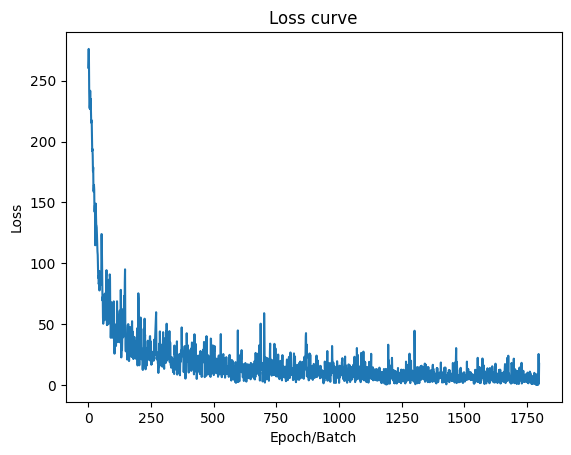

In [395]:
########################################
########## Plot loss curve #############
########################################
import matplotlib.pyplot as plt
plt.title('Loss curve')
plt.ylabel('Loss')
plt.xlabel('Epoch/Batch')
plt.plot(np.arange(0,len(train_losses)),train_losses)

## Evaluation (1 Points)

Now evaluate your model and measure how accurate is your model on both train and test datasets.


In [396]:
def accuracy(y_hat, y):
    ###################################
    ############ CODE HERE ############
    ###################################
    return np.mean(np.argmax(y_hat,axis=1)==y)
# y_hat=np.array([[0.2,0.5,0.3],[0.6,0.1,0.3]])
# y=np.array([1,0])
# accuracy(y_hat,y)


########################################
########## Calculate accuracy ##########
########################################
print(f'Accuracy train is: {accuracy(nn.predict(train_x),train_y)}')
print(f'Accuracy test is: {accuracy(nn.predict(test_x),test_y)}')   

Accuracy train is: 0.9819
Accuracy test is: 0.9722
